# Hi :)

----

# Import libraries

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.svm import SVC
from sklearn.datasets import make_classification
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, f1_score
from imblearn.over_sampling import SMOTE, ADASYN

# Creating the dataset

In [2]:
X, y= make_classification(
    n_samples= 100,           # Total samples
    n_features= 2,            # Number of features
    n_informative= 2,         # Number of informative features
    n_redundant= 0,           # Number of redundant features
    n_clusters_per_class= 2,  # Clusters per class
    weights= [0.84, 0.16],    # Imbalance ratio (90% class 0, 10% class 1)
    flip_y= 0,                # No label noise
    random_state= 48          # For reproducibility
)

# Convert to Pandas DataFrame for ease of use
columns= ['feature 1', 'feature 2']
imbalanced_dataset= pd.DataFrame(X, columns= columns)
imbalanced_dataset['Outcome']= y  # Adding target column
imbalanced_dataset.head()

,feature 1,feature 2,Outcome
0,-0.390683,-1.848499,0
1,-0.844860,-1.883245,0
2,-0.418441,-1.563106,0
3,-0.493042,-0.829701,0
4,-1.181133,1.045693,1


# Creating a function to check the model performance on the dataset

In [3]:
def rbf(dataset):
    X_train, X_test, Y_train, Y_test= train_test_split(dataset.drop(columns= ['Outcome']), dataset['Outcome'], test_size= 0.28, stratify= dataset['Outcome'], random_state= 48)
    y_labels= sorted(dataset['Outcome'].value_counts().unique().tolist())
    plt.style.use('fivethirtyeight')
    fig, ax= plt.subplots(figsize= (4, 3), dpi= 148)
    ax.bar(dataset.groupby(['Outcome'])['Outcome'].count().index, dataset.groupby(['Outcome'])['Outcome'].count().values, width= 0.28, alpha= 0.84)
    ax.set_xticks([0, 1])
    ax.set_xticklabels(["-", "+"], fontsize= 10)
    ax.set_yticks(y_labels)
    ax.set_yticklabels(y_labels, fontsize= 8)
    ax.set_title('"The count of person that has diabete"', fontsize= 10);
    rbf_svm= SVC(kernel= 'rbf', C= 1, gamma= 0.001)
    rbf_svm.fit(X_train, Y_train)
    Y_pred_train= rbf_svm.predict(X_train)
    accuracy_train= accuracy_score(Y_train, Y_pred_train)
    f1_train= f1_score(Y_train, Y_pred_train)
    print(f"Accuracy of RBF SVM (C=1, gamma=0.001)(Train): {accuracy_train:.4f}")
    print(f"F1-Score of RBF SVM (C=1, gamma=0.001)(Train): {f1_train:.4f}")
    Y_pred_test= rbf_svm.predict(X_test)
    accuracy_test= accuracy_score(Y_test, Y_pred_test)
    f1_test= f1_score(Y_test, Y_pred_test)
    print(f"Accuracy of RBF SVM (C=1, gamma=0.001)(Test): {accuracy_test:.4f}")
    print(f"F1-Score of RBF SVM (C=1, gamma=0.001)(Test): {f1_test:.4f}")
    return accuracy_train, accuracy_test, f1_train, f1_test

Imbalanced dataset

Accuracy of RBF SVM (C=1, gamma=0.001)(Train): 0.8451
F1-Score of RBF SVM (C=1, gamma=0.001)(Train): 0.0000
Accuracy of RBF SVM (C=1, gamma=0.001)(Test): 0.8276
F1-Score of RBF SVM (C=1, gamma=0.001)(Test): 0.0000


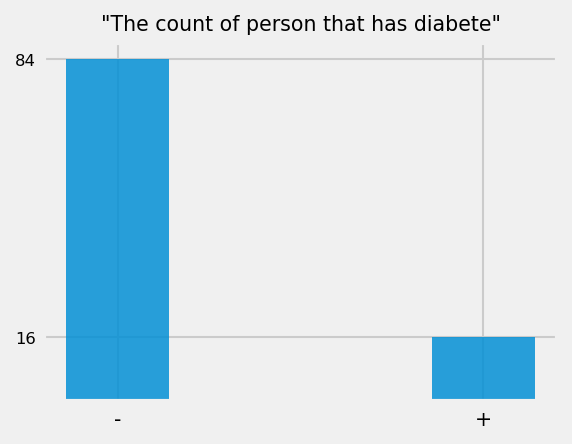

In [4]:
imbalanced_sample_accuracy_train, imbalanced_sample_accuracy_test, imbalanced_sample_f1_train, imbalanced_sample_f1_test= rbf(imbalanced_dataset)

SMOTE

In [5]:
smote = SMOTE(k_neighbors= 3, random_state= 48)
x_smote, y_smote= smote.fit_resample(imbalanced_dataset.drop(columns= ['Outcome']), imbalanced_dataset['Outcome'])
smote_oversample_dataset= x_smote.copy()
smote_oversample_dataset['Outcome']= y_smote
smote_oversample_dataset.head()

,feature 1,feature 2,Outcome
0,-0.390683,-1.848499,0
1,-0.844860,-1.883245,0
2,-0.418441,-1.563106,0
3,-0.493042,-0.829701,0
4,-1.181133,1.045693,1


Accuracy of RBF SVM (C=1, gamma=0.001)(Train): 0.8917
F1-Score of RBF SVM (C=1, gamma=0.001)(Train): 0.8992
Accuracy of RBF SVM (C=1, gamma=0.001)(Test): 0.9375
F1-Score of RBF SVM (C=1, gamma=0.001)(Test): 0.9388


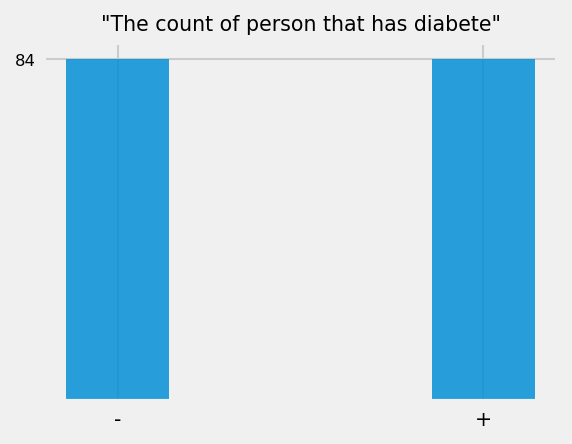

In [6]:
smote_oversample_dataset_accuracy_train, smote_oversample_dataset_accuracy_test, smote_oversample_dataset_f1_train, smote_oversample_dataset_f1_test= rbf(smote_oversample_dataset)

ADASYN

In [7]:
adasyn = ADASYN(n_neighbors= 3, random_state= 48)
x_adasyn, y_adasyn= adasyn.fit_resample(imbalanced_dataset.drop(columns= ['Outcome']), imbalanced_dataset['Outcome'])
adasyn_oversample_dataset= x_adasyn.copy()
adasyn_oversample_dataset['Outcome']= y_adasyn
adasyn_oversample_dataset.head()

,feature 1,feature 2,Outcome
0,-0.390683,-1.848499,0
1,-0.844860,-1.883245,0
2,-0.418441,-1.563106,0
3,-0.493042,-0.829701,0
4,-1.181133,1.045693,1


Accuracy of RBF SVM (C=1, gamma=0.001)(Train): 0.8333
F1-Score of RBF SVM (C=1, gamma=0.001)(Train): 0.8333
Accuracy of RBF SVM (C=1, gamma=0.001)(Test): 0.8750
F1-Score of RBF SVM (C=1, gamma=0.001)(Test): 0.8846


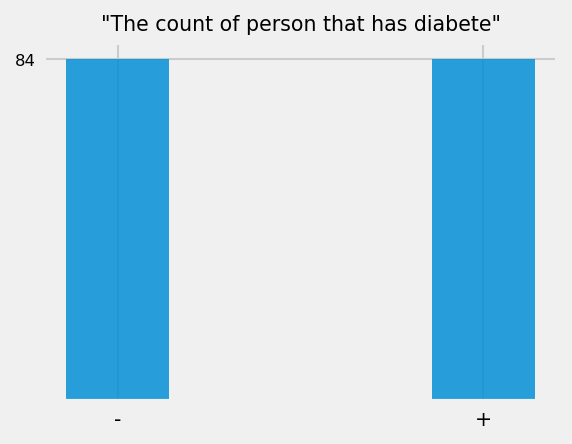

In [8]:
adasyn_oversample_dataset_accuracy_train, adasyn_oversample_dataset_accuracy_test, adasyn_oversample_dataset_f1_train, adasyn_oversample_dataset_f1_test= rbf(adasyn_oversample_dataset)

# Visualization

Accuracy

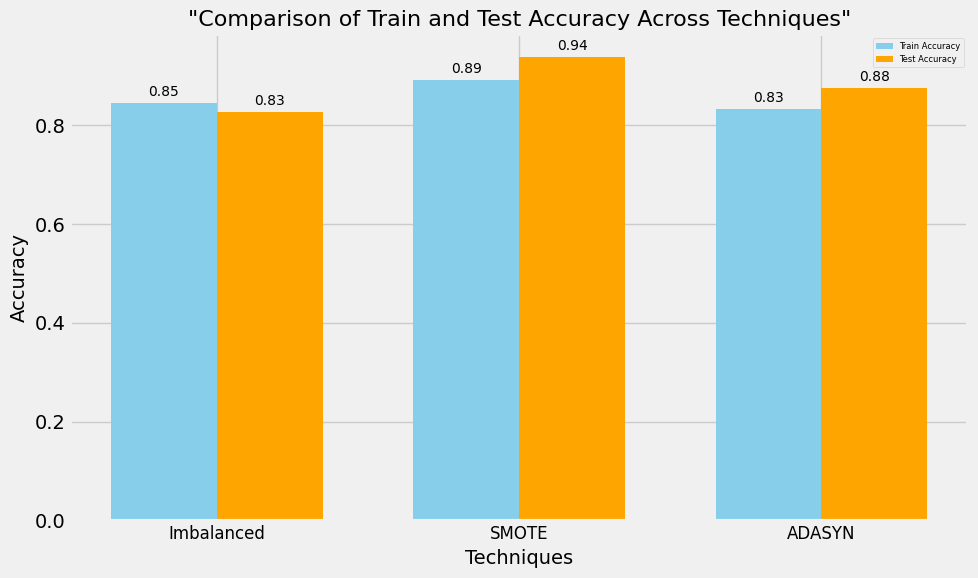

In [9]:
techniques= ['Imbalanced', 'SMOTE', 'ADASYN']
train_accuracy= [imbalanced_sample_accuracy_train, smote_oversample_dataset_accuracy_train, adasyn_oversample_dataset_accuracy_train]
test_accuracy= [imbalanced_sample_accuracy_test, smote_oversample_dataset_accuracy_test, adasyn_oversample_dataset_accuracy_test]
x= np.arange(len(techniques))
width= 0.35
fig, ax= plt.subplots(figsize=(10, 6))
bars1= ax.bar(x - width / 2, train_accuracy, width, label= 'Train Accuracy', color= 'skyblue')
bars2= ax.bar(x + width / 2, test_accuracy, width, label= 'Test Accuracy', color= 'orange')
ax.set_xlabel('Techniques', fontsize= 14)
ax.set_ylabel('Accuracy', fontsize= 14)
ax.set_title('"Comparison of Train and Test Accuracy Across Techniques"', fontsize= 16)
ax.set_xticks(x)
ax.set_xticklabels(techniques, fontsize= 12)
ax.legend(fontsize= 6)
def add_labels(bars):
    for bar in bars:
        height= bar.get_height()
        ax.annotate(f'{height:.2f}',
                    xy= (bar.get_x() + bar.get_width() / 2, height),
                    xytext= (0, 3),
                    textcoords= "offset points",
                    ha= 'center', va= 'bottom', fontsize= 10)
add_labels(bars1)
add_labels(bars2)
plt.tight_layout()
plt.show()

F1-Score

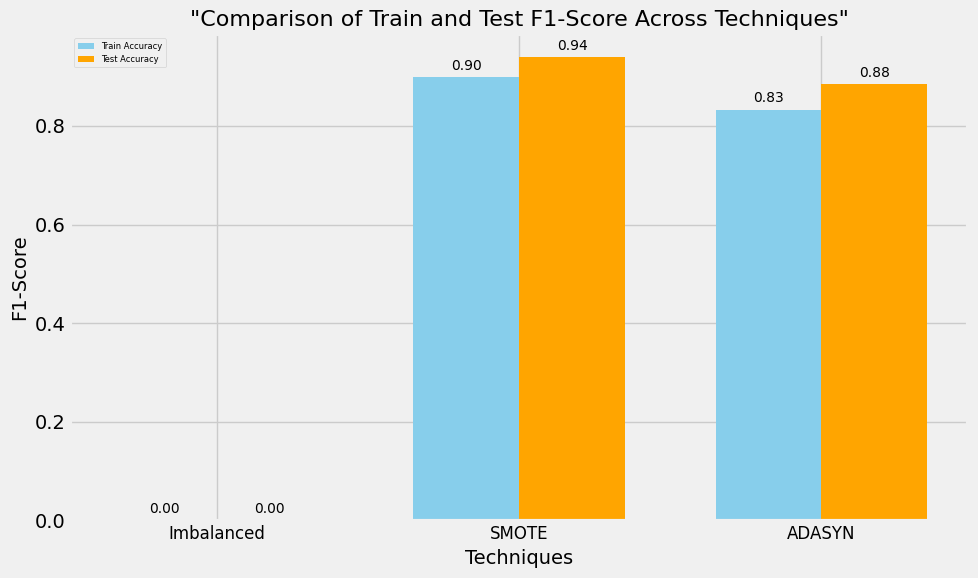

In [10]:
techniques= ['Imbalanced', 'SMOTE', 'ADASYN']
train_accuracy= [imbalanced_sample_f1_train, smote_oversample_dataset_f1_train, adasyn_oversample_dataset_f1_train]
test_accuracy= [imbalanced_sample_f1_test, smote_oversample_dataset_f1_test, adasyn_oversample_dataset_f1_test]
x= np.arange(len(techniques))
width= 0.35
fig, ax= plt.subplots(figsize=(10, 6))
bars1= ax.bar(x - width / 2, train_accuracy, width, label= 'Train Accuracy', color= 'skyblue')
bars2= ax.bar(x + width / 2, test_accuracy, width, label= 'Test Accuracy', color= 'orange')
ax.set_xlabel('Techniques', fontsize= 14)
ax.set_ylabel('F1-Score', fontsize= 14)
ax.set_title('"Comparison of Train and Test F1-Score Across Techniques"', fontsize= 16)
ax.set_xticks(x)
ax.set_xticklabels(techniques, fontsize= 12)
ax.legend(fontsize= 6)
def add_labels(bars):
    for bar in bars:
        height= bar.get_height()
        ax.annotate(f'{height:.2f}',
                    xy= (bar.get_x() + bar.get_width() / 2, height),
                    xytext= (0, 3),
                    textcoords= "offset points",
                    ha= 'center', va= 'bottom', fontsize= 10)
add_labels(bars1)
add_labels(bars2)
plt.tight_layout()
plt.show()

# Data distribution

In [11]:
def scatter_plot(dataset, title):
    plt.style.use('fivethirtyeight')
    fig, ax= plt.subplots(figsize= (10, 6))
    class_0= dataset[dataset['Outcome'] == 0]
    ax.scatter(class_0['feature 1'], class_0['feature 2'], c= 'blue', label= '-', alpha= 0.8, marker= 'o')
    class_1= dataset[dataset['Outcome'] == 1]
    ax.scatter(class_1['feature 1'], class_1['feature 2'], c= 'red', label= '+', alpha= 0.8, marker= 'o')
    ax.axis('off')
    ax.grid(False)
    ax.legend(title= 'Outcome', title_fontsize= 8, fontsize= 8, loc= 'upper right')
    ax.set_title(title, fontsize= 14)
    fig.patch.set_facecolor('white')
    ax.set_facecolor('white')

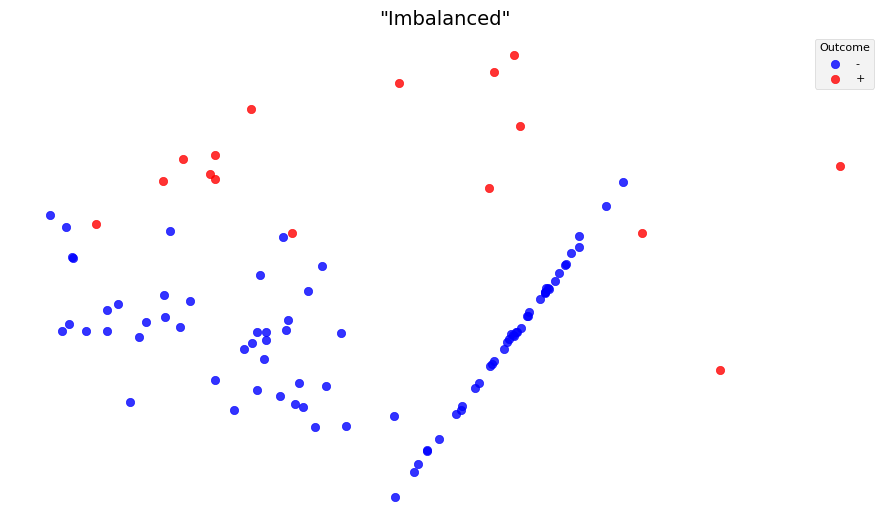

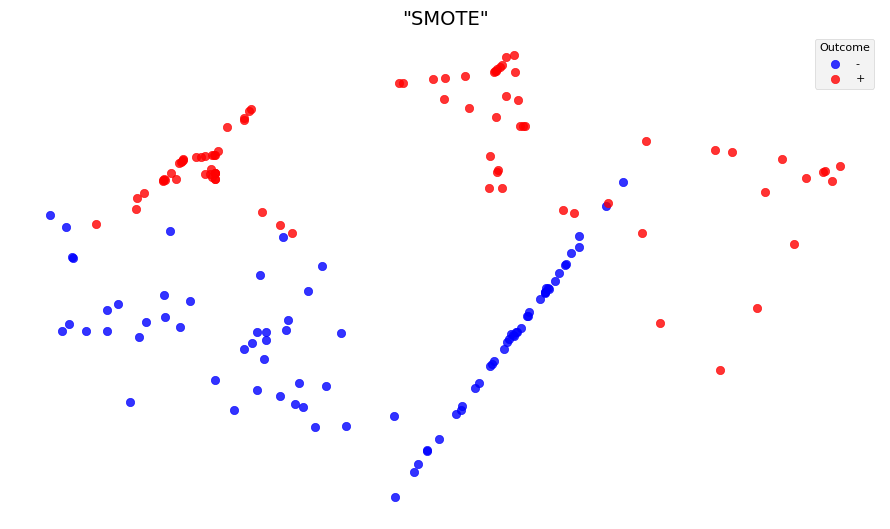

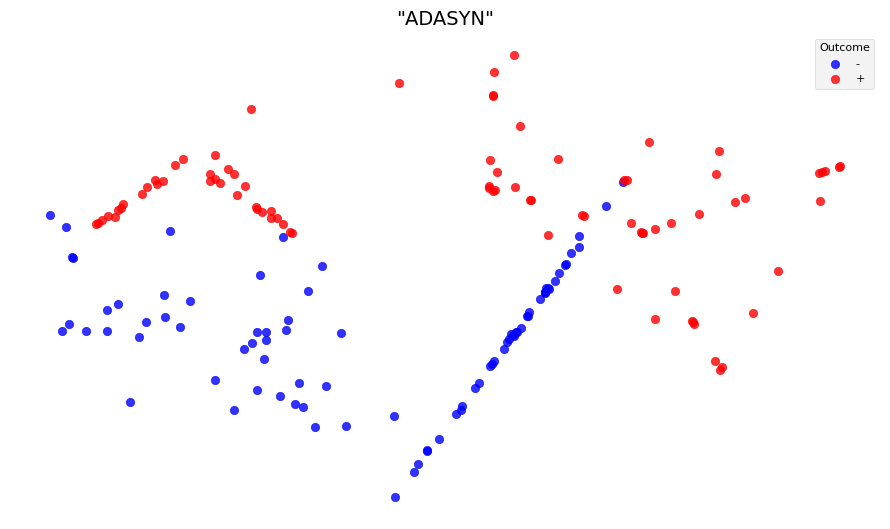

In [12]:
scatter_plot(imbalanced_dataset, '"Imbalanced"')
scatter_plot(smote_oversample_dataset, '"SMOTE"')
scatter_plot(adasyn_oversample_dataset, '"ADASYN"')

In [13]:
def group_scatter_plot(dataset, title, ax):
    class_0= dataset[dataset['Outcome'] == 0]
    class_1= dataset[dataset['Outcome'] == 1]
    
    ax.scatter(class_0['feature 1'], class_0['feature 2'], c= 'blue', label= '-', alpha= 0.8, marker= 'o')
    ax.scatter(class_1['feature 1'], class_1['feature 2'], c= 'red', label= '+', alpha= 0.8, marker= 'o')

    ax.set_title(title, fontsize= 12)
    ax.axis('off')
    ax.legend(title= "Outcome", title_fontsize= 8, fontsize= 8, loc= 'upper right') if (title == '"ADASYN"') else None
    fig.patch.set_facecolor('white')
    ax.set_facecolor('white')

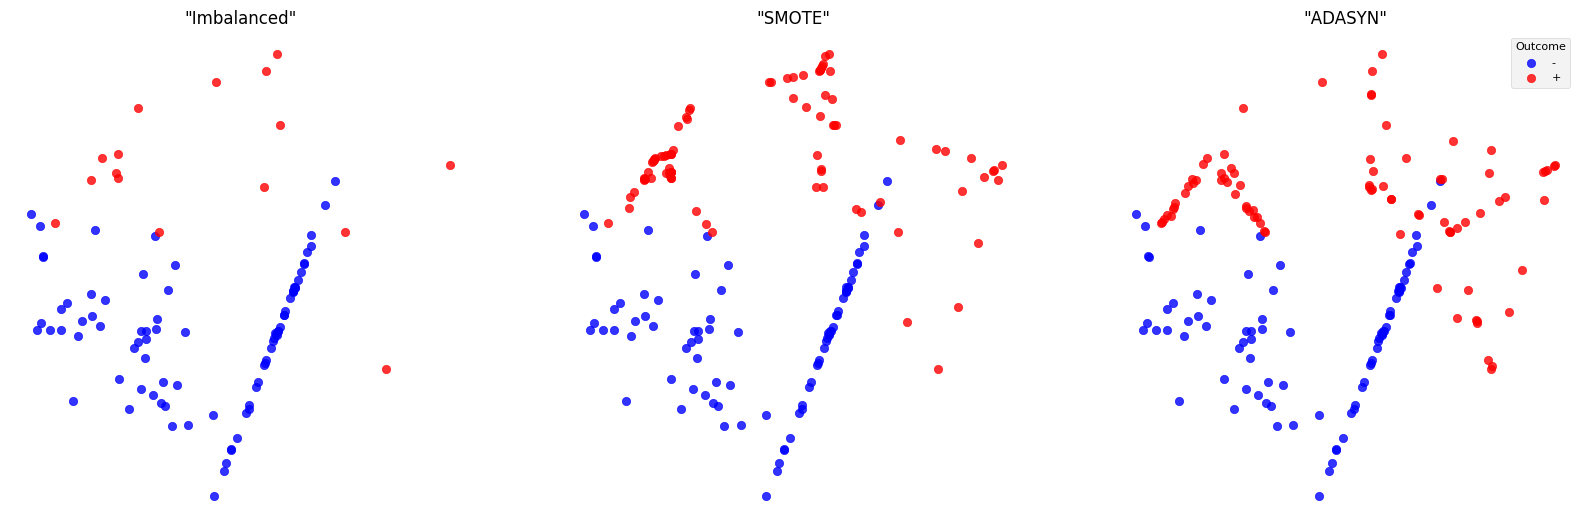

In [14]:
plt.style.use('fivethirtyeight')
fig, axes= plt.subplots(1, 3, figsize= (18, 6))

group_scatter_plot(imbalanced_dataset, '"Imbalanced"', axes[0])
group_scatter_plot(smote_oversample_dataset, '"SMOTE"', axes[1])
group_scatter_plot(adasyn_oversample_dataset, '"ADASYN"', axes[2])